In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [436]:
df=pd.read_csv('data.csv')
df.head()

,person_id,age,brushing frequency,flossing habits,Sugar Consumption (g/day),Dental Health Risk Score
0,1,59,2.0,Never,40,0.85
1,2,42,1.0,Never,30,0.70
2,3,29,1.0,Never,20,0.55
3,4,17,1.0,Never,15,0.40
4,5,73,2.0,Never,50,0.90


In [437]:
# looking at data with 5 random samples
df.sample(5)

,person_id,age,brushing frequency,flossing habits,Sugar Consumption (g/day),Dental Health Risk Score
44,45,75,1.0,daily,30,0.45
11,12,25,1.0,daily,30,0.75
13,14,68,2.0,daily,40,0.85
17,18,51,2.0,Never,20,0.65
58,59,63,1.0,daily,37,0.45


DATA EXPLORATION


In [438]:
#finding data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_id                  62 non-null     int64  
 1   age                        62 non-null     int64  
 2   brushing frequency         61 non-null     float64
 3   flossing habits            62 non-null     object 
 4   Sugar Consumption (g/day)  62 non-null     int64  
 5   Dental Health Risk Score   62 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.0+ KB


In [439]:
#looking for missing values
df.isnull().sum()

person_id                    0
age                          0
brushing frequency           1
flossing habits              0
Sugar Consumption (g/day)    0
Dental Health Risk Score     0
dtype: int64

In [440]:
#there is a missing value in brushing frequency column
#filling it with mean value
mean_value = int(df['brushing frequency'].mean())
df['brushing frequency'].fillna(mean_value, inplace=True)

In [441]:
#no miising values now
df.isnull().sum()

person_id                    0
age                          0
brushing frequency           0
flossing habits              0
Sugar Consumption (g/day)    0
Dental Health Risk Score     0
dtype: int64

In [442]:
#data looks mathematically
df.describe()

,person_id,age,brushing frequency,Sugar Consumption (g/day),Dental Health Risk Score
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,51.419355,1.451613,33.306452,0.516935
std,18.041619,21.664770,0.533391,19.719000,0.226329
min,1.000000,16.000000,1.000000,10.000000,0.150000
25%,16.250000,33.000000,1.000000,20.000000,0.300000
50%,31.500000,52.500000,1.000000,30.000000,0.450000
75%,46.750000,68.750000,2.000000,45.000000,0.700000
max,62.000000,88.000000,3.000000,120.000000,0.950000


In [443]:
# we do not need person id column
df.drop('person_id',axis=1,inplace=True)

In [444]:
df.head()

,age,brushing frequency,flossing habits,Sugar Consumption (g/day),Dental Health Risk Score
0,59,2.0,Never,40,0.85
1,42,1.0,Never,30,0.70
2,29,1.0,Never,20,0.55
3,17,1.0,Never,15,0.40
4,73,2.0,Never,50,0.90


In [445]:
#finding max and min age
max_age=df['age'].max()
min_age=df['age'].min()

print('max age is: {} , and min age is: {}'.format(max_age,min_age))

max age is: 88 , and min age is: 16


representing data


sugar consumption

<ipython-input-446-f0efee634c38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sugar Consumption (g/day)'])


<Axes: xlabel='Sugar Consumption (g/day)', ylabel='Density'>

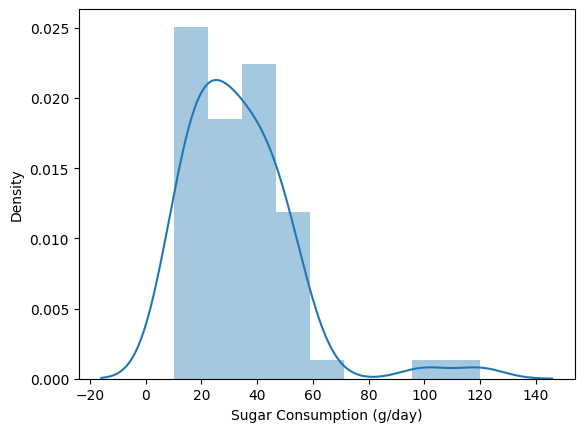

In [446]:
sns.distplot(df['Sugar Consumption (g/day)'])

<Axes: >

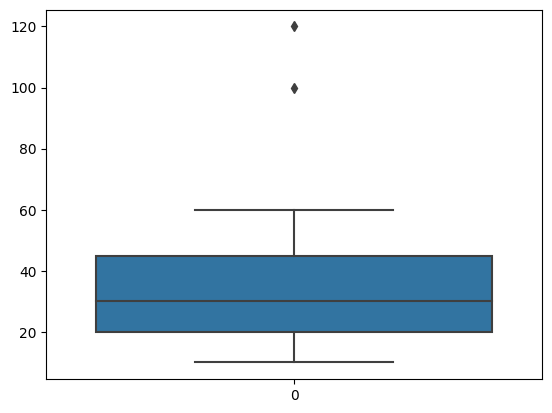

In [447]:
sns.boxplot(df['Sugar Consumption (g/day)'])

In [448]:
df['Sugar Consumption (g/day)'].skew()

1.970632410741054

AGE

<ipython-input-449-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

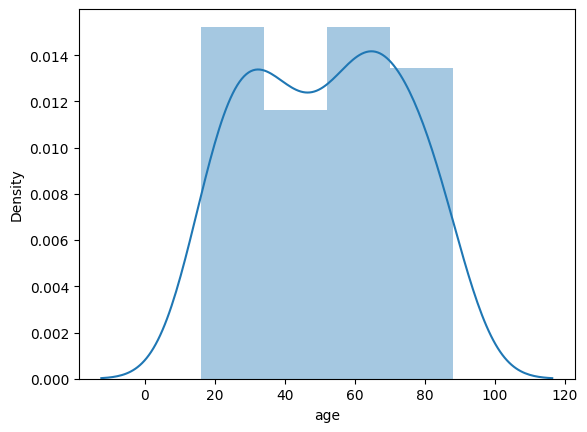

In [449]:
sns.distplot(df['age'])

<Axes: >

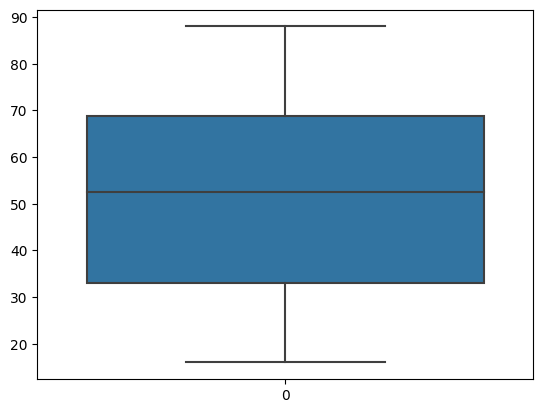

In [450]:
sns.boxplot(df['age'])

flossing

([<matplotlib.patches.Wedge at 0x7b9895671720>,
 [Text(0.32929942576105575, 1.0495531850237219, 'never'),
  Text(-0.9617812858204877, -0.5338321442602435, 'sometimes'),
  Text(0.7972720121625676, -0.7578636675697357, 'always')],
 [Text(0.17961786859693948, 0.5724835554674846, '40.3%'),
  Text(-0.5246079740839024, -0.2911811695964964, '35.5%'),
  Text(0.4348756429977641, -0.41338018231076484, '24.2%')])

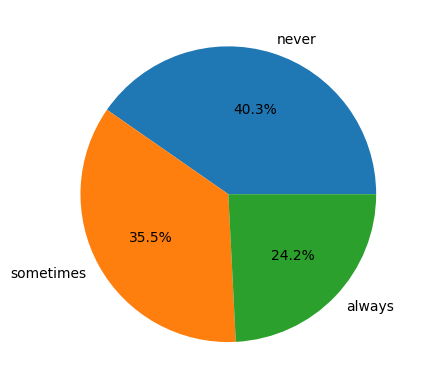

In [451]:
plt.pie(df['flossing habits'].value_counts(),labels=['never','sometimes','always'],autopct='%1.1f%%')

brushing

<Axes: >

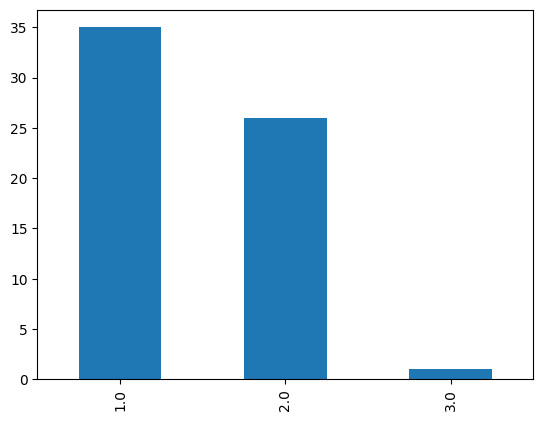

In [452]:
df['brushing frequency'].value_counts().plot(kind='bar')

sugar consumption

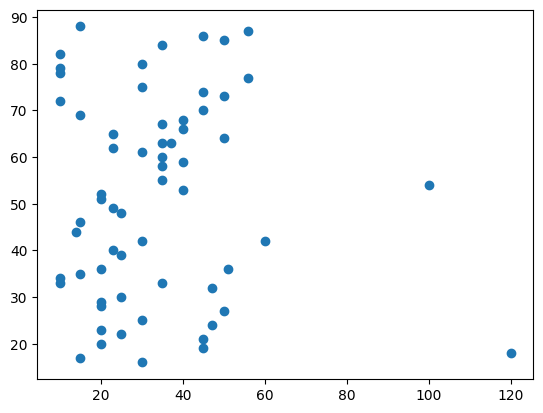

In [453]:
#scatter plot of sugar consumption
plt.scatter(df['Sugar Consumption (g/day)'],df['age'])

In [454]:
#changing brushing frequency data type to int
df['brushing frequency']=df['brushing frequency'].astype('int32')

STANDARDIZATION

In [455]:
df.head()

,age,brushing frequency,flossing habits,Sugar Consumption (g/day),Dental Health Risk Score
0,59,2,Never,40,0.85
1,42,1,Never,30,0.70
2,29,1,Never,20,0.55
3,17,1,Never,15,0.40
4,73,2,Never,50,0.90


In [456]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [457]:
df2=df
df2['flossing habits']=le.fit_transform(df2['flossing habits'])

In [458]:
from sklearn.model_selection import train_test_split

In [459]:
df2=df2.rename(columns={'Sugar Consumption (g/day)': 'sugar'})
df2=df2.rename(columns={'brushing frequency': 'brush'})
df2=df2.rename(columns={'flossing habits': 'flos'})
df2=df2.rename(columns={'Dental Health Risk Score': 'risk'})

In [460]:
df2.head()

,age,brush,flos,sugar,risk
0,59,2,0,40,0.85
1,42,1,0,30,0.70
2,29,1,0,20,0.55
3,17,1,0,15,0.40
4,73,2,0,50,0.90


In [461]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     62 non-null     int64  
 1   brush   62 non-null     int32  
 2   flos    62 non-null     int64  
 3   sugar   62 non-null     int64  
 4   risk    62 non-null     float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.3 KB


In [462]:
X = df2[['age', 'brush', 'flos', 'sugar']]
y = df2['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [463]:
len(X_train)

49

In [464]:
len(X_test)

13

In [465]:
from sklearn.ensemble import RandomForestRegressor

In [466]:
model = RandomForestRegressor(n_estimators=50, random_state=42)


In [467]:
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [468]:
predictions = model.predict(X_test)

In [469]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.039099076923076855


In [470]:
from sklearn.metrics import confusion_matrix

In [493]:
new_data = pd.DataFrame({'age': [59], 'brush': [1], 'flos': [0], 'sugar': [25]})
prediction = model.predict(new_data)
rounded_prediction = round(prediction[0] * 100, 2)
print(f'Health Risk: {rounded_prediction}%')

if rounded_prediction>50 and rounded_prediction<75:
  print("You need to work on your dental health")
elif rounded_prediction > 75:
    print("You are at high risk of oral problem")
elif rounded_prediction>25 and rounded_prediction<50:
    print("your oral health is moderate, can be better")
else:
    print("your oral health is good")

Health Risk: 47.5%
your oral health is moderate, can be better
